# My First EDA

## This script intends to make a first EDA analysis of the dataset of the following link: https://www.kaggle.com/datasets/joshuanaude/effects-of-alcohol-on-student-performance/data 

## Let's try to get some conclusions (if there any) about the alcohol effects on students performance


In [2]:
import numpy as np                                                      # Here we import the libraries that will be use dduring the analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

df = pd.read_csv(r"C:\Users\MarcosBlasi\Downloads\effects-alcohol.csv") # Here we import the dataframe

print(df)


                      Timestamp Your Sex?  \
0     2024/03/07 5:12:01 pm EET    Female   
1     2024/03/07 5:12:08 pm EET      Male   
2     2024/03/07 5:12:25 pm EET      Male   
3     2024/03/07 5:12:28 pm EET      Male   
4     2024/03/07 5:13:00 pm EET    Female   
..                          ...       ...   
401  2024/03/12 11:05:33 am EET    Female   
402   2024/03/12 3:26:14 pm EET    Female   
403  2024/03/13 10:32:19 pm EET    Female   
404  2024/03/13 10:32:27 pm EET      Male   
405  2024/03/16 10:30:36 pm EET    Female   

     Your Matric (grade 12) Average/ GPA (in %)  \
0                                          76.0   
1                                          89.0   
2                                          76.0   
3                                          89.0   
4                                          74.0   
..                                          ...   
401                                        74.0   
402                                        73.0   


#### GPA is defined as the grade point average of all the carreer grades. Let's take a look into the column titles, to understand the dataset information better.

In [3]:
column_headers = list(df.columns.values)                                                       # Here we create the list of names that 

print(column_headers)                                                                          # We show the values

renamed_columns = { 'Timestamp':'timestamp', 
                   'Your Sex?':'sex',  
                   'Your Matric (grade 12) Average/ GPA (in %)':'high_school_gpa',             # As the titles are pretty messy, we change them so the dataframe becomes more comprehensive
                   'What year were you in last year (2023) ?':'year_of_study_2023', 
                   'What faculty does your degree fall under?':'faculty', 
                   'Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)':'gpa_2023', 
                   'Your Accommodation Status Last Year (2023)': 'accomodation_status_2023', 
                   'Monthly Allowance in 2023':'monthly_allowance_2023', 
                   'Were you on scholarship/bursary in 2023?':'scholarship_status_2023', 
                   'Additional amount of studying (in hrs) per week':'additional_study_hours', 
                   'How often do you go out partying/socialising during the week?':'weekly_nights_out',
                   'On a night out, how many alcoholic drinks do you consume?': 'alcoholic_drinks_in_a_night', 
                   'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)':'missed_lectures', 
                   'How many modules have you failed thus far into your studies?':'failed_modules', 
                   'Are you currently in a romantic relationship?':'relationship_status', 
                   'Do your parents approve alcohol consumption?':'parents_approval',
                   'How strong is your relationship with your parent/s?':'parents_relationship'}

df = df.rename(columns=renamed_columns)                                                        # Here we rename columns based on the dictionary we defined before

print(df.head(3))


['Timestamp', 'Your Sex?', 'Your Matric (grade 12) Average/ GPA (in %)', 'What year were you in last year (2023) ?', 'What faculty does your degree fall under?', 'Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)', 'Your Accommodation Status Last Year (2023)', 'Monthly Allowance in 2023', 'Were you on scholarship/bursary in 2023?', 'Additional amount of studying (in hrs) per week', 'How often do you go out partying/socialising during the week? ', 'On a night out, how many alcoholic drinks do you consume?', 'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)', 'How many modules have you failed thus far into your studies?', 'Are you currently in a romantic relationship?', 'Do your parents approve alcohol consumption?', 'How strong is your relationship with your parent/s?']
                   timestamp     sex  high_school_gpa year_of_study_2023  \
0  2024/03/07 5:12:01 pm EET  Female             76.0         

#### Based on the information defined before, we will carry out and see if we can define correlations and values mentioned below:

#### GPA per Sex // GPA & Carreer type (faculty) // GPA & accomodation status // Scholarship & GPA // Additional Study Hours & GPA // Alcoholic drinks & GPA // Alcoholic drinks & Missed lectures // Alcoholic drinks & Failed Modules // Alcoholic drinks and parents approval.

#### To do so, we need to defined first which variables are categorical and which variables are numerical. Also, to know how many samples (rows) and features (columns) do we have. Let's start with samples & features.

In [4]:
# With df.shape() method we get a tuple with the dataframe dimensions.

samples_rows = df.shape[0]                                                            # Here we get the rows
features_columns = df.shape[1]                                                        # Here we get the columns

print("The dataframe has {}, and {} columns".format(samples_rows, features_columns))  

df.info()                                                                             # Here we get more inflormation about the dataframe

The dataframe has 406, and 17 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   timestamp                                                       406 non-null    object 
 1   sex                                                             404 non-null    object 
 2   high_school_gpa                                                 399 non-null    float64
 3   year_of_study_2023                                              333 non-null    object 
 4   faculty                                                         399 non-null    object 
 5   gpa_2023                                                        320 non-null    float64
 6   accomodation_status_2023                                        383 non-null    object 
 7   monthly_allowan

### We do not have much data in order to assure variable correlations, but we can draw some conclusions and builds graphs to get some initial information over our dataset

### In the next step, all null objects will be set as "Unknown" and in the numerical values we will use the median to replace nulls, so we avoid outliers (lower or highest) influence.
### We will do it only in the variables that we are going to use.

In [41]:
print(df.isnull().sum())                                                    # Here we count the nulls in each column


df['sex'].fillna('Unknown', inplace=True)                                   # Here we fill all categorical variables that we are going to use with certain values
df['year_of_study_2023'].fillna('Unknown', inplace=True)
df['faculty'].fillna('Unknown', inplace=True)
df['accomodation_status_2023'].fillna('Unknown', inplace=True)
df['scholarship_status_2023'].fillna('Unknown', inplace=True)
df['additional_study_hours'].fillna('Unknown', inplace=True)
df['alcoholic_drinks_in_a_night'].fillna('Unknown', inplace=True)
df['missed_lectures'].fillna('Unknown', inplace=True)
df['failed_modules'].fillna('Unknown', inplace=True)
df['parents_approval'].fillna('Unknown', inplace=True)
df['relationship_status'].fillna('Unknown', inplace=True)

df['high_school_gpa'].fillna(df['high_school_gpa'].median(), inplace=True)   # Here we use the median to fill the empty values.
df['gpa_2023'].fillna(df['gpa_2023'].median(), inplace=True)


timestamp                                                          0
sex                                                                0
high_school_gpa                                                    0
year_of_study_2023                                                 0
faculty                                                            0
gpa_2023                                                           0
accomodation_status_2023                                           0
monthly_allowance_2023                                            31
scholarship_status_2023                                            0
additional_study_hours                                             0
How often do you go out partying/socialising during the week?      2
alcoholic_drinks_in_a_night                                        0
missed_lectures                                                    0
failed_modules                                                     0
relationship_status               

### We are going to need some functions to print categorical and numeric variables.

In [6]:
def plot_categorical(df, column, labelRotation=0):
    """ Auxiliary function to plot categoricals
    """
    plt.figure(figsize=(8, 6))  # Set the figure size
    sns.countplot(data=df, x=column, hue=column, palette='cividis')

    # Adjust x-axis labels for readability
    plt.xlabel(column, fontsize=12)
    if labelRotation != 0:
        plt.xticks(rotation=labelRotation)
    plt.tight_layout()  # Adjust spacing after rotation
    plt.ylabel('Frequency', fontsize=12)
    plt.title(column, fontsize=14)
    plt.show()


def plot_numeric(df,column):
    """ Auxiliary function to plot numericals. This function prints two graphs. The first one shows an histogram (variable frequency) and the second one shows a boxplot, showing variable dispersion
    """
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Add graph title
    plt.title(column, fontsize=14)
    # Shows graph
    plt.show()
    
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=column)
    # xlabel adjustment
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    # Add graph title
    plt.title(column, fontsize=14)
    # Shows graph
    plt.show()

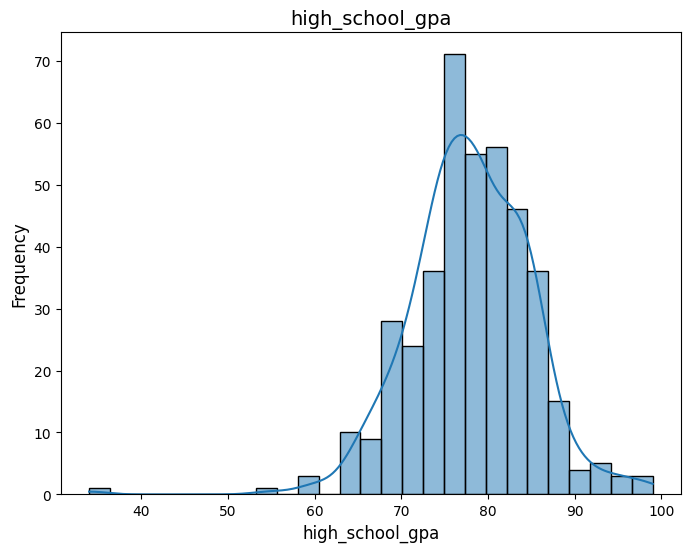

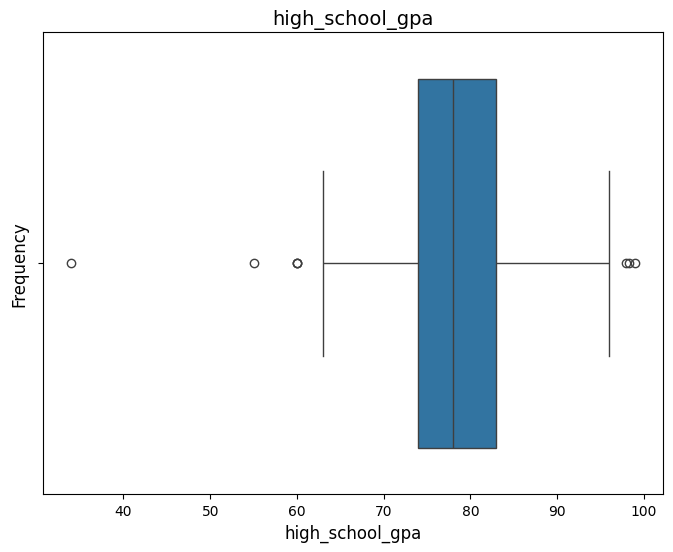

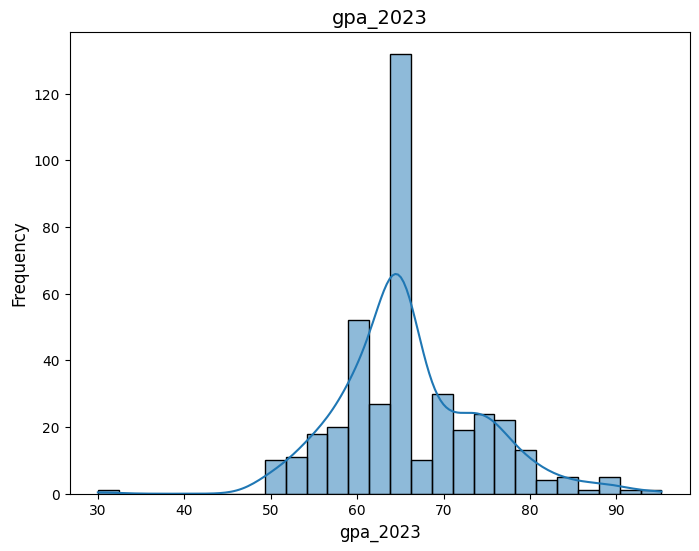

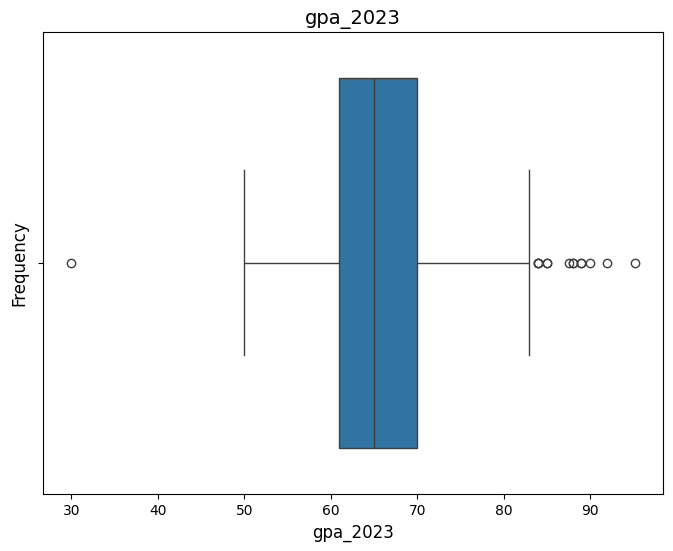

<class 'pandas.core.series.Series'>
RangeIndex: 406 entries, 0 to 405
Series name: high_school_gpa
Non-Null Count  Dtype  
--------------  -----  
406 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


In [7]:
# Here we print the only available numerical variables in the dataframe

# First variable is the highschool gpa
# Second variable is 2023 gpa

plot_numeric(df, 'high_school_gpa')   
plot_numeric(df, 'gpa_2023')    


df['high_school_gpa'].info()

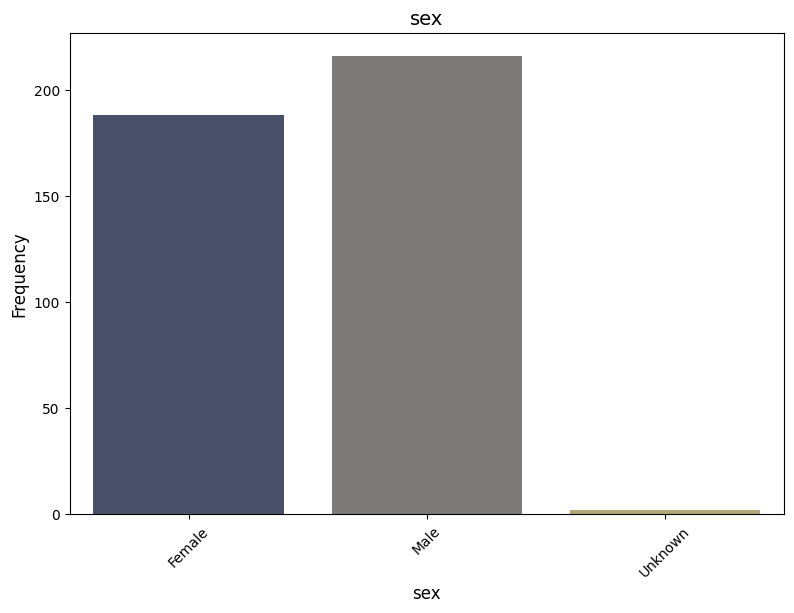

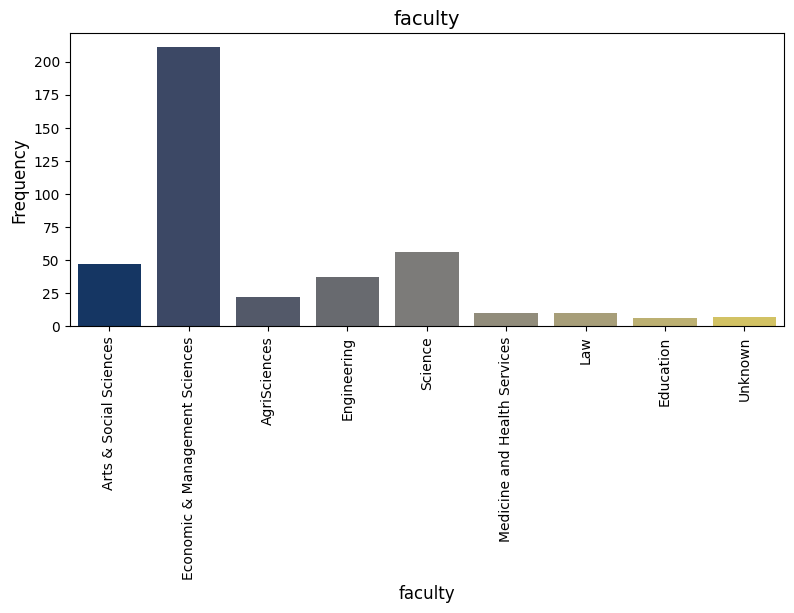

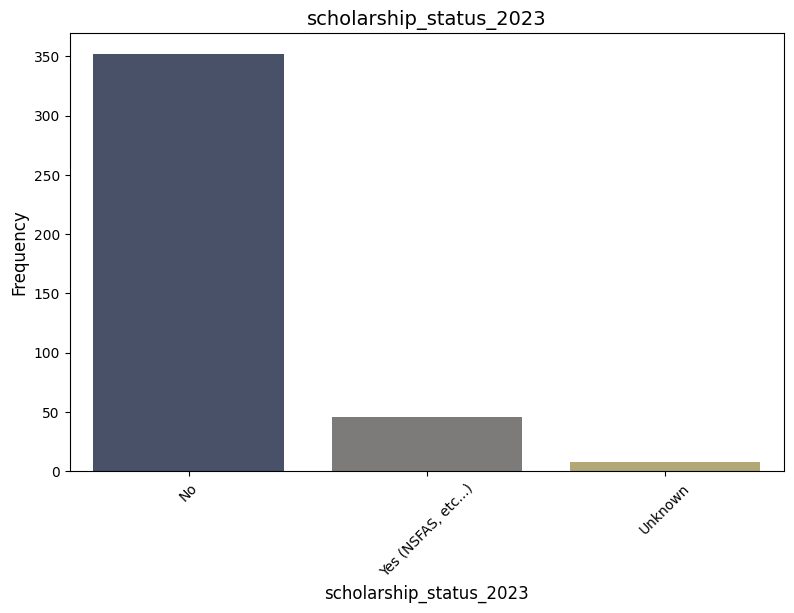

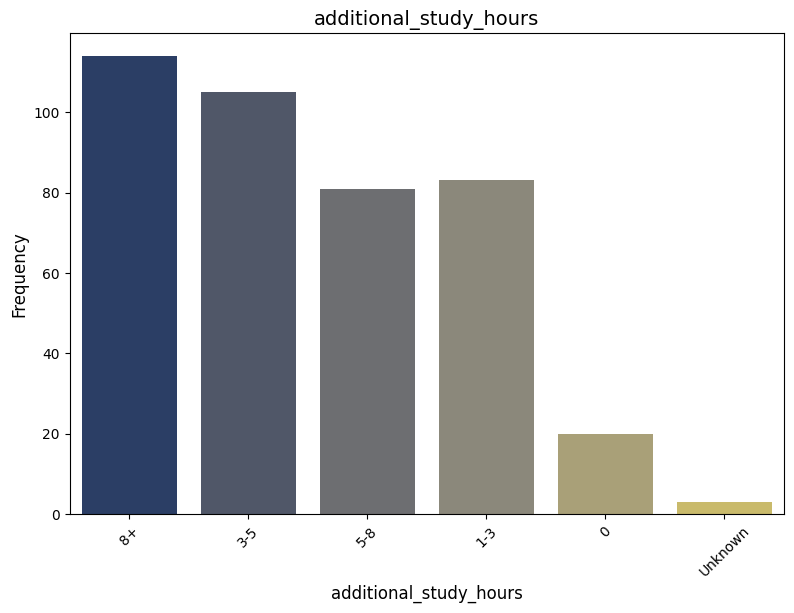

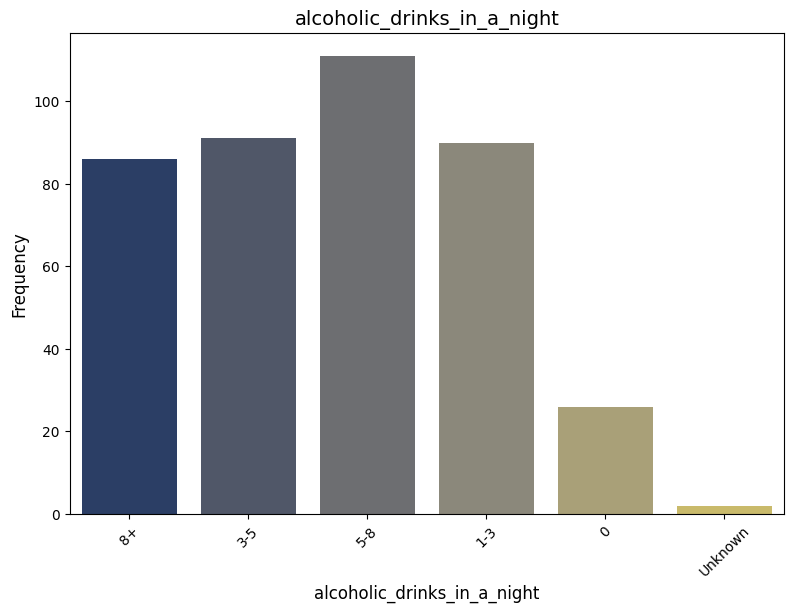

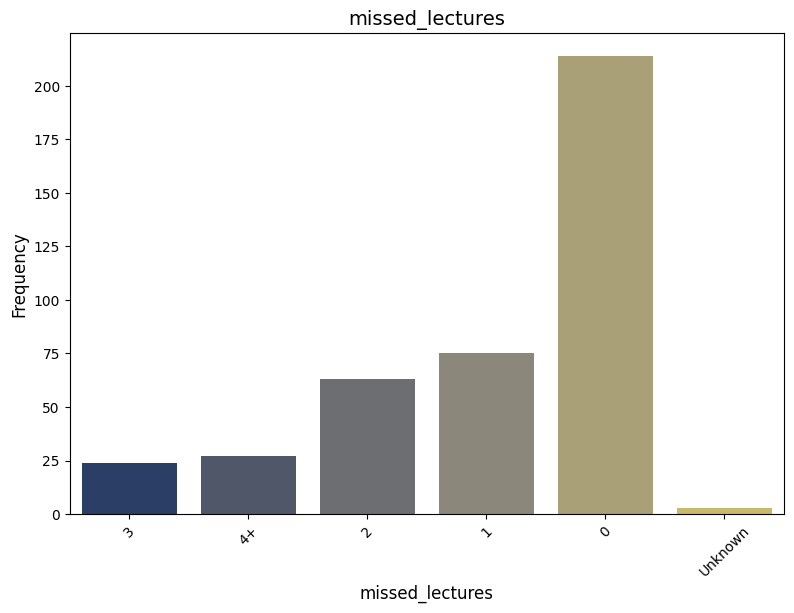

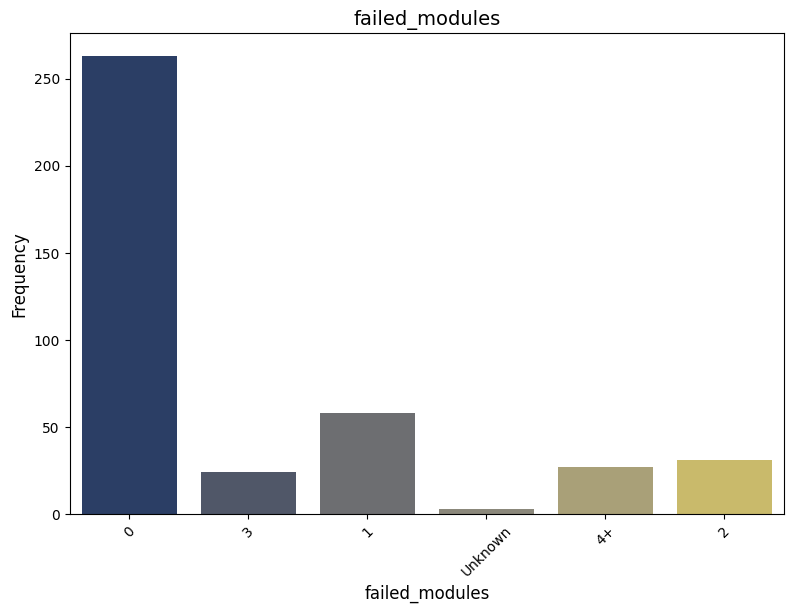

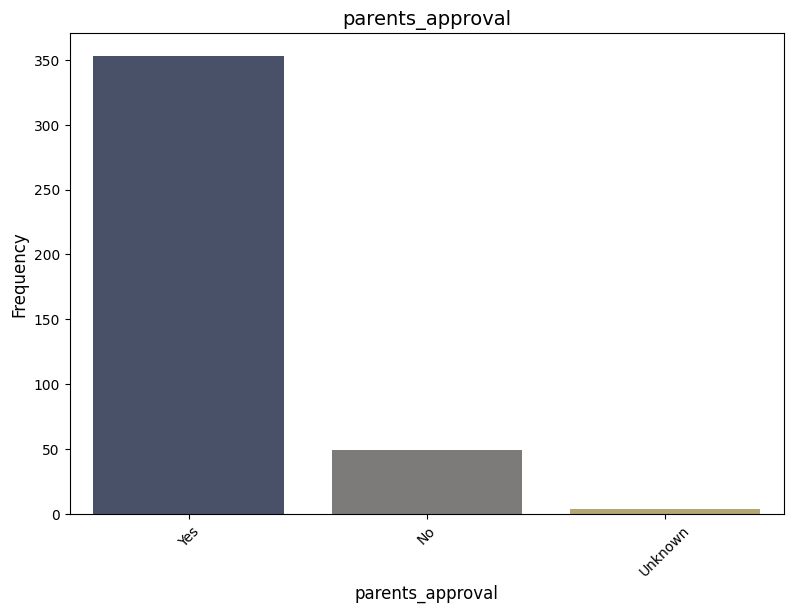

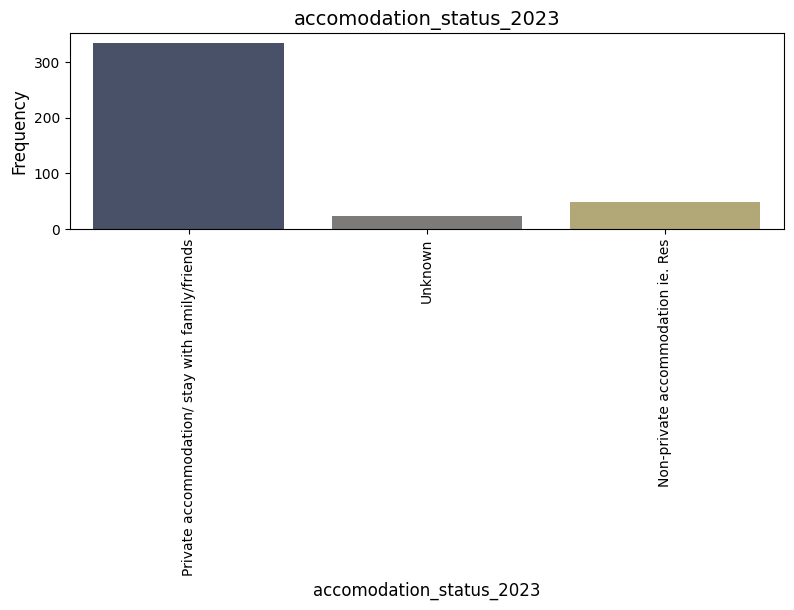

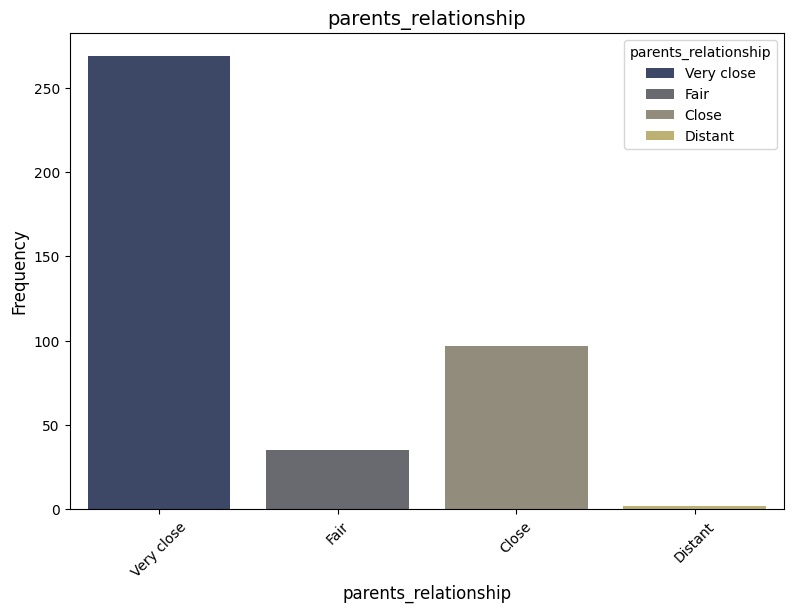

In [8]:
# Here we are going to print some relevant available categorical variables in the dataframe for our analysis, to get some more information

plot_categorical(df, 'sex', labelRotation=45)
plot_categorical(df, 'faculty', labelRotation=90)
plot_categorical(df, 'scholarship_status_2023', labelRotation=45)
plot_categorical(df, 'additional_study_hours', labelRotation=45)
plot_categorical(df, 'alcoholic_drinks_in_a_night', labelRotation=45)
plot_categorical(df, 'missed_lectures', labelRotation=45)
plot_categorical(df, 'failed_modules', labelRotation=45)
plot_categorical(df, 'parents_approval', labelRotation=45)
plot_categorical(df, 'accomodation_status_2023', labelRotation=90)
plot_categorical(df, 'parents_relationship', labelRotation=45)


#### As we have seen before, We do not have much data in order to assure variable correlations, but we can stablish some hipothesis and see if there is variable correlation or not.

#### Some of the Hipothesis that we will try to validate will be:

#### GPA-Related Hipothesis:
#### 1° - Males or females tend to have a higher GPA than the contrary gender.
#### 2° - Students from on a science or maths related field (such as engineering or economics) tend to have greater GPA's than the rest.
#### 3° - Students that have private accomodation have higher GPAs.
#### 4° - Students that have scholarships have higher GPAs.
#### 5° - Students who dedicate higher extra-hours amounts have greater GPA's than those who don't.
#### 6° - Students that consume more alcoholic drinks have lower GPAs. 
#### 7° - Students whose parents do not approve alcohol consumption have higher GPAs.



In [50]:
# First Hipothesis test: Males or females have a higher GPA than the contrary gender. 

# In order to do so, we will try a Boxplot with the variables "sex" and "gpa_2023"

median_by_gender = df.groupby('sex')['gpa_2023'].median()                            # We calculate medians to 
mean_by_gender = df.groupby('sex')['gpa_2023'].mean()

print("Median by gender is", median_by_gender)
print("Mean by gender is", mean_by_gender)


Median by gender is sex
Female     65.0
Male       65.0
Unknown    65.0
Name: gpa_2023, dtype: float64
Mean by gender is sex
Female     67.071330
Male       65.076389
Unknown    65.000000
Name: gpa_2023, dtype: float64


### This first analysis does not show a considerable difference in the median value, so there is not enough evidence to ensure that females or males tend to have higher GPA values. We can see that 

C:\Users\MarcosBlasi\AppData\Local\Temp\ipykernel_32628\2606281625.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'faculty', y = 'gpa_2023', data = df, orient='v', palette='Set2')        # In 'x' axis we plot the gender and in 'y' axis we plot GPA data. Data means the data source where we get the information and "orient" is the 'y' value orientation.


Text(0, 0.5, 'GPA 2023')

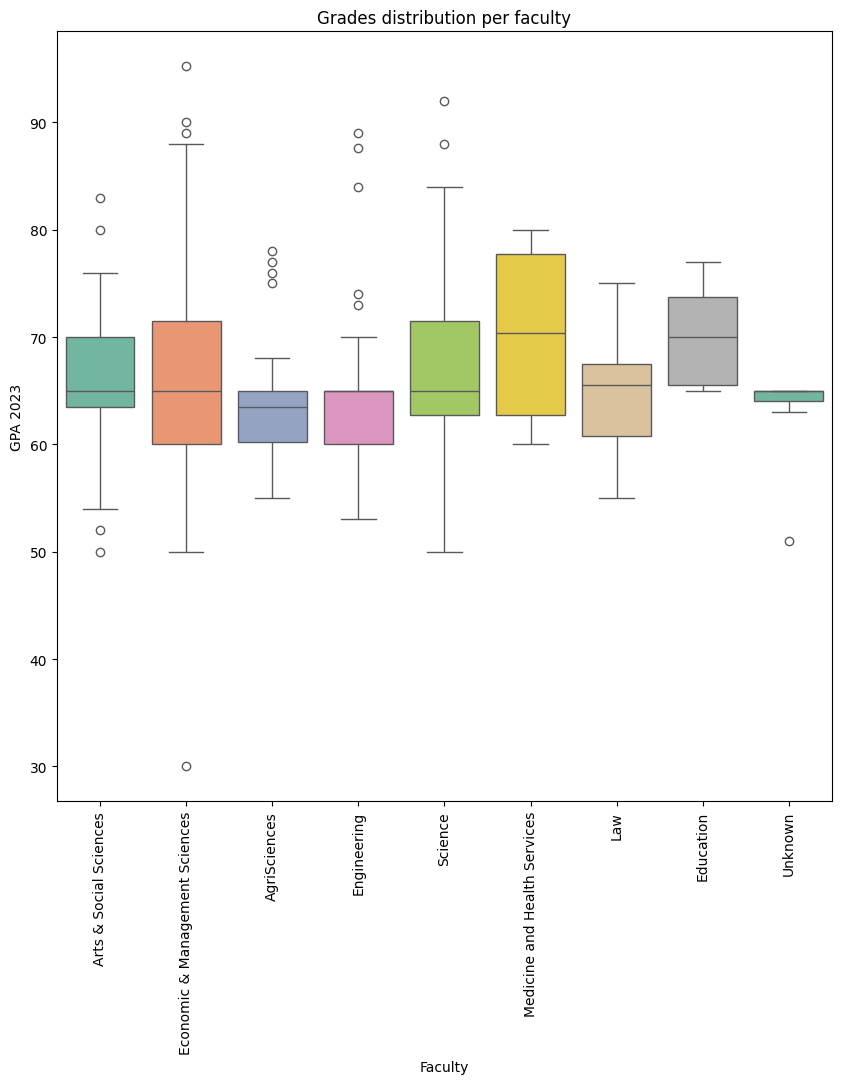

In [23]:
# Second Hipothesis test: Students from on a science or maths related field (such as engineering or economics) tend to have greater GPA's than the rest.

plt.figure(figsize=(10,10))                                                          # Here we set the graph size, note that the second value is the "y" size

sns.boxplot(x = 'faculty', y = 'gpa_2023', data = df, orient='v', palette='Set2')        # In 'x' axis we plot the gender and in 'y' axis we plot GPA data. Data means the data source where we get the information and "orient" is the 'y' value orientation.

plt.title('Grades distribution per faculty')
plt.xlabel('Faculty')
plt.xticks(rotation = 90)
plt.ylabel('GPA 2023')

### From the graph above we can see that lowest grades are registered in engineering faculty, whilst highest grades are registered in Medicine and Health Services faculty.

C:\Users\MarcosBlasi\AppData\Local\Temp\ipykernel_32628\1962242488.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'accomodation_status_2023', y = 'gpa_2023', data = df, orient='v', palette='Set2')        # In 'x' axis we plot the gender and in 'y' axis we plot GPA data. Data means the data source where we get the information and "orient" is the 'y' value orientation.


Text(0, 0.5, 'GPA 2023')

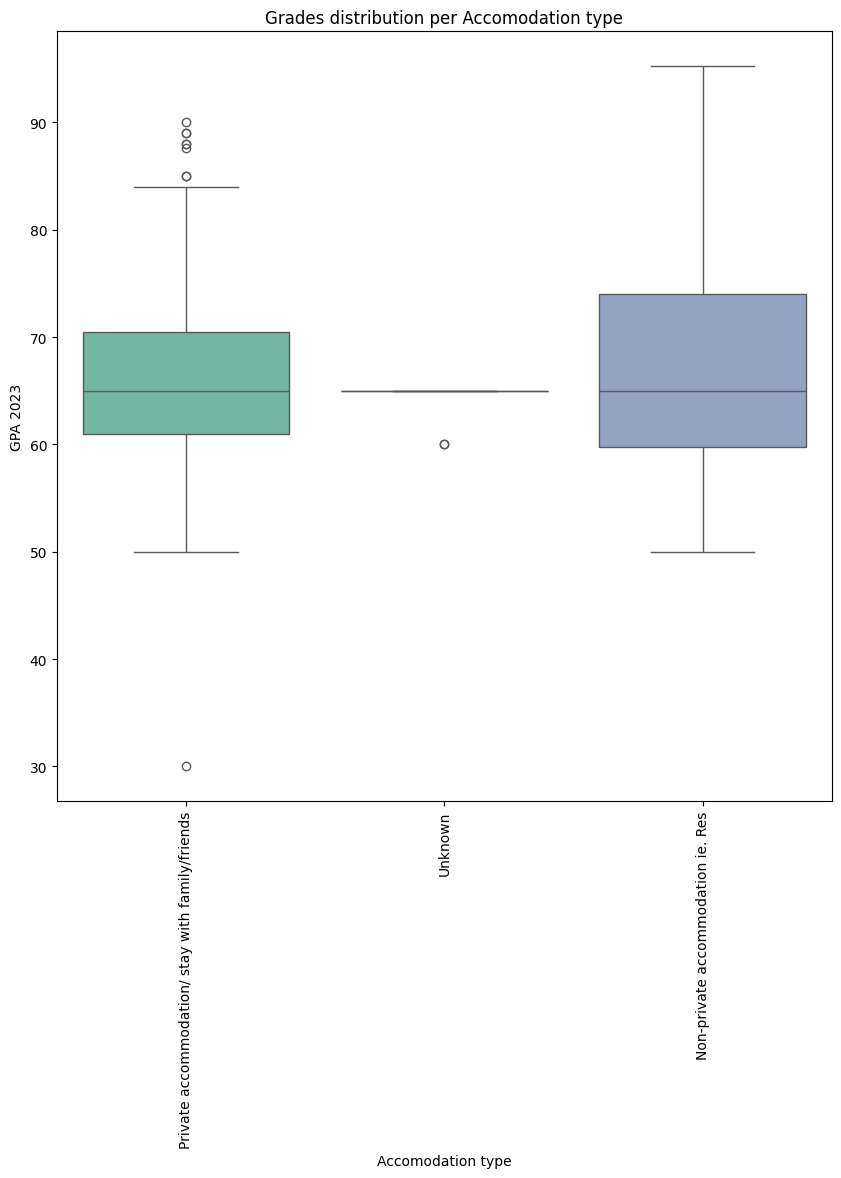

In [24]:
# Third Hipothesis is that Students that have private accomodation have higher GPAs, so we will try to plot this in a boxplot comparing different GPA vs. accomodation types.

plt.figure(figsize=(10,10))                                                          # Here we set the graph size, note that the second value is the "y" size

sns.boxplot(x = 'accomodation_status_2023', y = 'gpa_2023', data = df, orient='v', palette='Set2')        # In 'x' axis we plot the gender and in 'y' axis we plot GPA data. Data means the data source where we get the information and "orient" is the 'y' value orientation.

plt.title('Grades distribution per Accomodation type')
plt.xlabel('Accomodation type')
plt.xticks(rotation = 90)
plt.ylabel('GPA 2023')


### As median values (50th percentile) are equal, we can say that accomodation type does not affect gpa results. We can see some potential outliers for the private accomodation group. If we were to discard this, and considering non-private accomodation, we can see that this accomodation type has higher dispersion, which means more variability in GPA values.

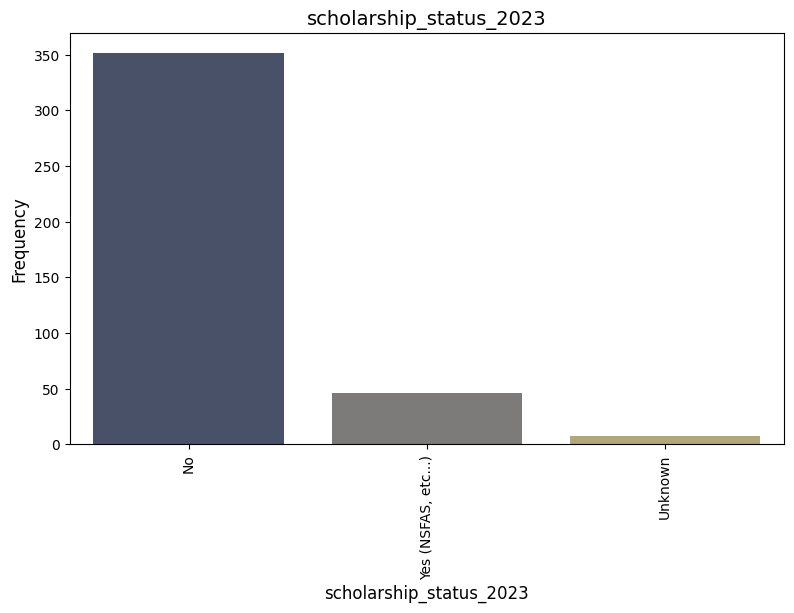

C:\Users\MarcosBlasi\AppData\Local\Temp\ipykernel_32628\341790899.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'scholarship_status_2023', y = 'gpa_2023', data = df, orient='v', palette='Set2')        # In 'x' axis we plot the gender and in 'y' axis we plot GPA data. Data means the data source where we get the information and "orient" is the 'y' value orientation.


Text(0, 0.5, 'GPA 2023')

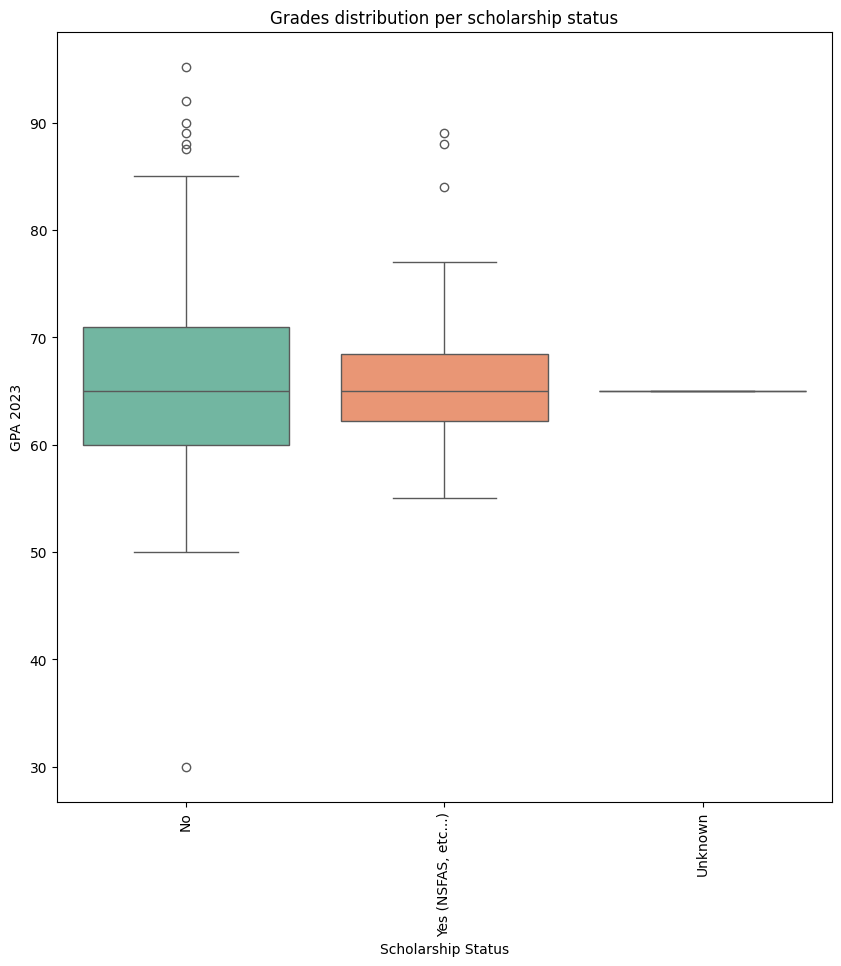

In [26]:
# Fourth Hipothesis is that Students with scholarships have higher GPAs, so we will try to plot this in a boxplot comparing different GPA vs. accomodation types.
# We will print the categorical variable first so we can see the amount of students that have scholarships

plot_categorical(df, 'scholarship_status_2023', labelRotation=90)                                         # Print categorical frequency


plt.figure(figsize=(10,10))                                                                               # Here we set the graph size, note that the second value is the "y" size

sns.boxplot(x = 'scholarship_status_2023', y = 'gpa_2023', data = df, orient='v', palette='Set2')        # In 'x' axis we plot the gender and in 'y' axis we plot GPA data. Data means the data source where we get the information and "orient" is the 'y' value orientation.

plt.title('Grades distribution per scholarship status')
plt.xlabel('Scholarship Status')
plt.xticks(rotation = 90)
plt.ylabel('GPA 2023')


### From this particular analysis, we do not see enough evidence to ensure that students that have scholarships have higher GPAs. Also, we can see that for this particular dataset scholarship students population represent around 8% of total registers, so the sample is not big enough to draw conclusions.

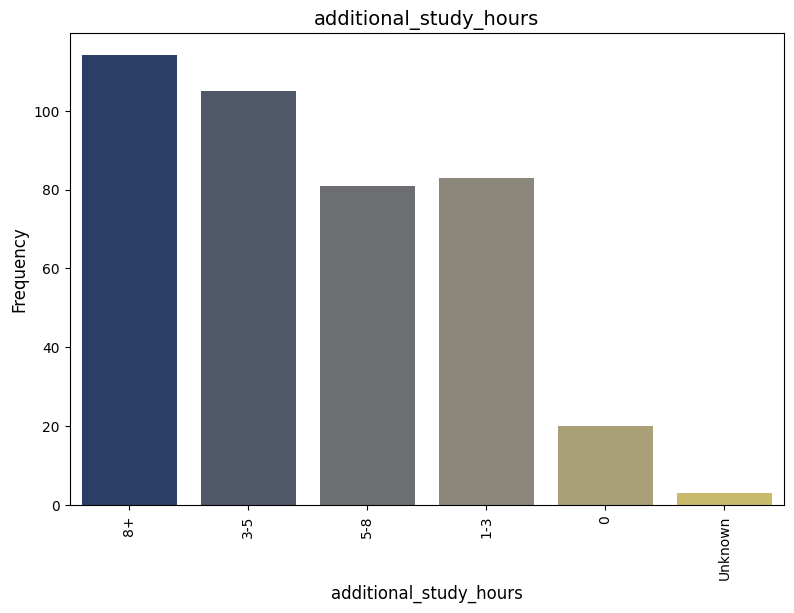

C:\Users\MarcosBlasi\AppData\Local\Temp\ipykernel_32628\985804936.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'additional_study_hours', y = 'gpa_2023', data = df, orient='v', palette='Set2')        # In 'x' axis we plot the gender and in 'y' axis we plot GPA data. Data means the data source where we get the information and "orient" is the 'y' value orientation.


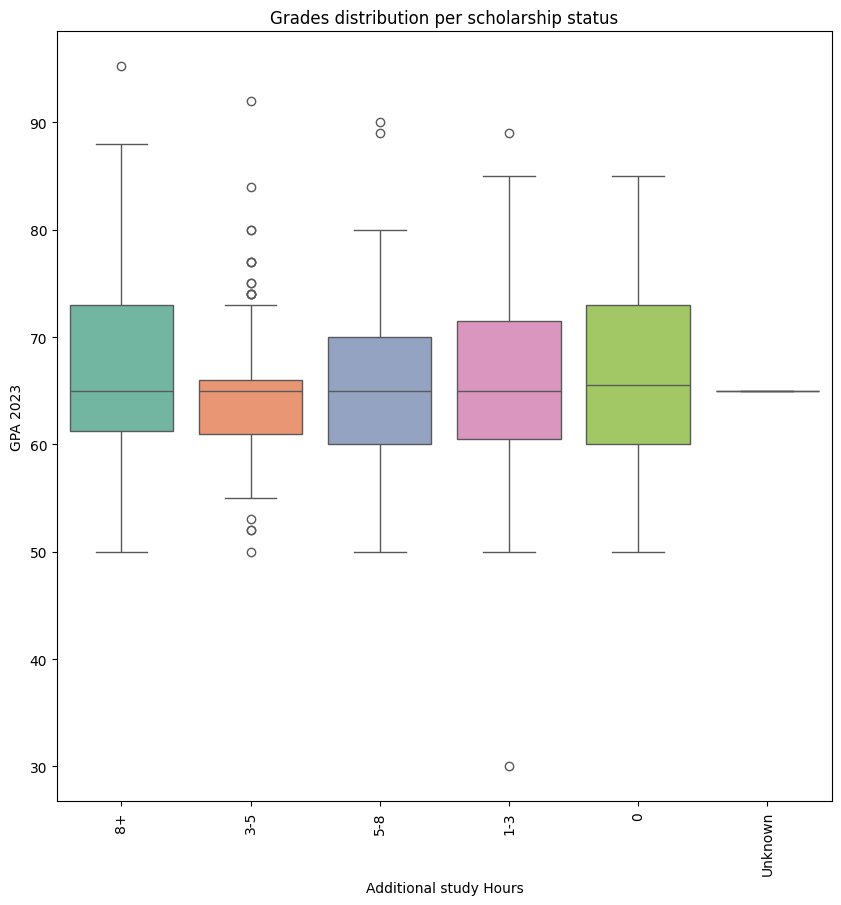

In [48]:
# Fifth Hipothesis: Students who dedicate higher extra-hours amounts have greater GPA's than those who don't.

# We will print the categorical variable first so we can see how many students spend extra hours

plot_categorical(df, 'additional_study_hours', labelRotation=90)                                         # Print categorical frequency


plt.figure(figsize=(10,10))                                                                               # Here we set the graph size, note that the second value is the "y" size

sns.boxplot(x = 'additional_study_hours', y = 'gpa_2023', data = df, orient='v', palette='Set2')        # In 'x' axis we plot the gender and in 'y' axis we plot GPA data. Data means the data source where we get the information and "orient" is the 'y' value orientation.

plt.title('Grades distribution per scholarship status')
plt.xlabel('Additional study Hours')
plt.xticks(rotation = 90)
plt.ylabel('GPA 2023')
plt.show()


### From this last graph, we can see that median values are pretty similar, so there is no evidence that dedicanting extra hours during the weekend leads to higher GPAs.

C:\Users\MarcosBlasi\AppData\Local\Temp\ipykernel_32628\2035891593.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'gpa_2023', y = 'alcoholic_drinks_in_a_night', data = df, orient='h', palette='Set1')        # In 'x' axis we plot the gender and in 'y' axis we plot GPA data. Data means the data source where we get the information and "orient" is the 'y' value orientation.


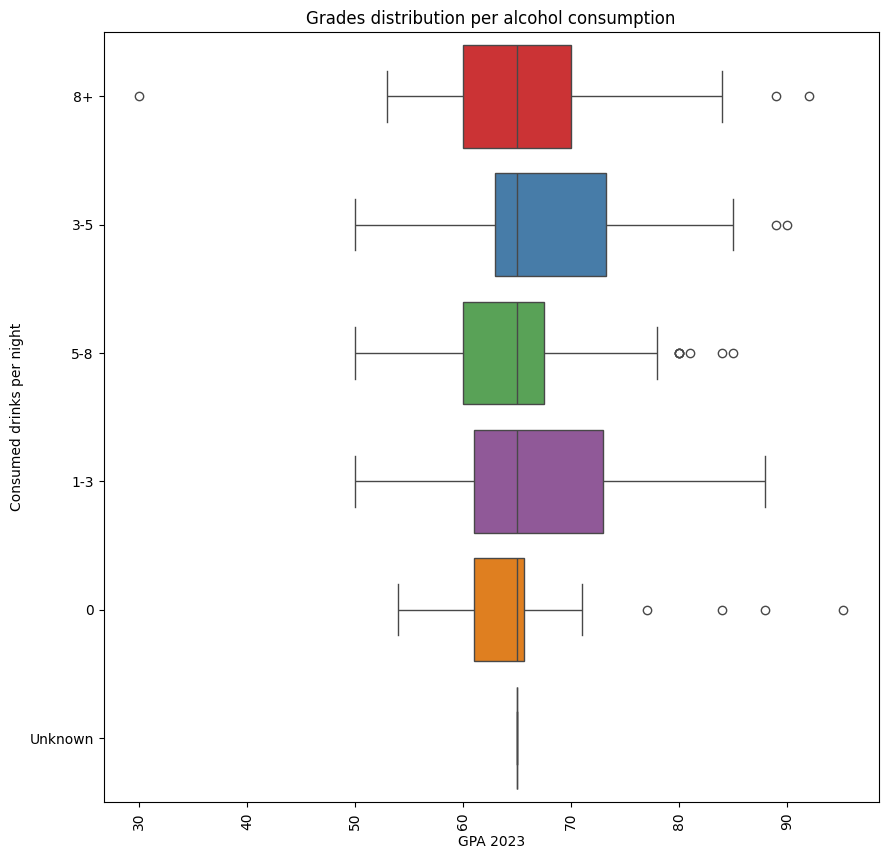

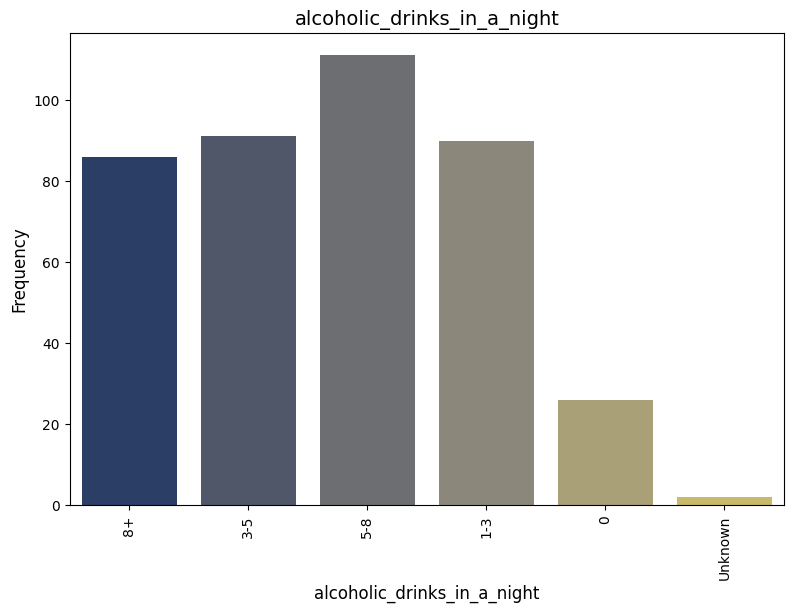

In [46]:
# Sixth hipothesis: Students that consume more alcoholic drinks have lower GPAs. 

plt.figure(figsize=(10,10))                                                                               # Here we set the graph size, note that the second value is the "y" size

sns.boxplot(x = 'gpa_2023', y = 'alcoholic_drinks_in_a_night', data = df, orient='h', palette='Set1')        # In 'x' axis we plot the gender and in 'y' axis we plot GPA data. Data means the data source where we get the information and "orient" is the 'y' value orientation.

plt.title('Grades distribution per alcohol consumption')
plt.xlabel('GPA 2023')
plt.xticks(rotation = 90)
plt.ylabel('Consumed drinks per night')
plt.show()

plot_categorical(df, 'alcoholic_drinks_in_a_night', labelRotation=90)                                         # Print categorical frequency

### At a first glass, higher alcohol consumption does not indicate significant influence in GPA variation.

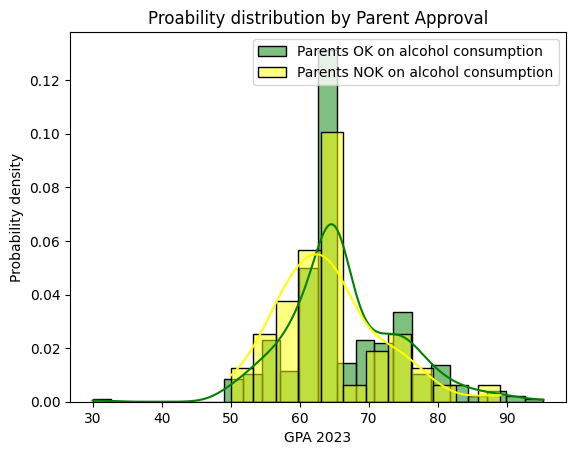

In [45]:
# 7° - Seventh hipothesis: students whose parents do not approve alcohol consumption have higher GPAs.

df_parents_approval = df.loc[df["parents_approval"] == 'Yes']
df_no_parents_approval = df.loc[df["parents_approval"] == 'No']

sns.histplot(data = df_parents_approval, x='gpa_2023', color='green', label="Parents OK on alcohol consumption", stat="density", kde=True)
sns.histplot(data = df_no_parents_approval, x='gpa_2023', color='yellow', label="Parents NOK on alcohol consumption", stat="density", kde=True)

plt.title('Proability distribution by Parent Approval')
plt.xlabel('GPA 2023')
plt.ylabel('Probability density')
plt.legend()
plt.show()


type